In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt


Que 2  Write a function that can shift an MNIST image in any direction (left, right, up,
or down) by one pixel.5 Then, for each image in the training set, create four shif‐
ted copies (one per direction) and add them to the training set. Finally, train your
best model on this expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now! This technique of
artificially growing the training set is called data augmentation or training set
expansion.

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version=1)

In [8]:
X = mnist["data"]
y = mnist["target"]
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
some_digit = X.iloc[0]

In [24]:
from scipy.ndimage import shift
def shift_image(image,dx,dy):
    image = image.reshape((28,28))
    shifted_image = shift(image,[dy,dx],cval=0,mode="constant")
    return shifted_image.flatten()
    

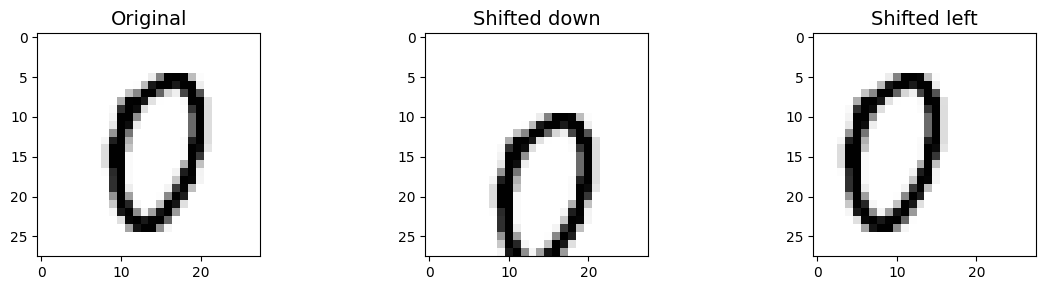

In [25]:
image = X_train.iloc[1000].to_numpy()  # Convert Series to NumPy array
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.tight_layout()
plt.show()


In [ ]:
X_train_augmented = []
y_train_augmented = []

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train.to_numpy(), y_train):
        shifted = shift_image(image, dx, dy)

        shifted = np.asarray(shifted).flatten()
        if shifted.shape != (784,):
            print(f"Skipping bad shape: {shifted.shape}")
            continue

        X_train_augmented.append(shifted)
        y_train_augmented.append(label)


X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


In [28]:
X_train_final = np.concatenate([X_train.to_numpy(), X_train_augmented])
y_train_final = np.concatenate([y_train.to_numpy(), y_train_augmented])

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

shuffle_idx = np.random.permutation(len(X_train_final))
X_train_final = X_train_final[shuffle_idx]
y_train_final = y_train_final[shuffle_idx]
knn_clf.fit(X_train_final,y_train_final)

KNeighborsClassifier()

In [43]:
from sklearn.metrics import accuracy_score
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.9754

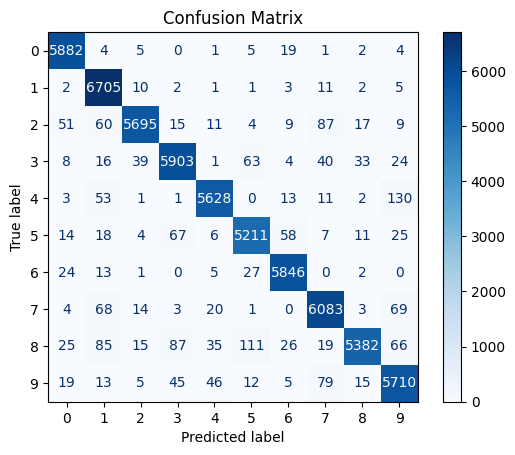